# Homework 9
## Problem 1.1
Determine the minimum number of equilibrium stages ($N_{min}$)

$N_{min}$ is determined by assuming a limiting case of total reflux where only solvent is coming in but no solute. This means that the operating line is $y=x$ and the stages can then be counted.

In [7]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [8]:
file = pd.read_csv('Txy.csv')                       #data from csv
temp = file['T'].values
x = file['x'].values
y = file['y'].values

xInterp = interp1d(y,x)                             #interpolated data
yInterp = interp1d(x,y)

z = .5                                              #feed comp molfrac
F = 45                                              #feed kg/hr
xD = .85                                            #molfrac distil
xB = .1                                             #molfrac bott

''

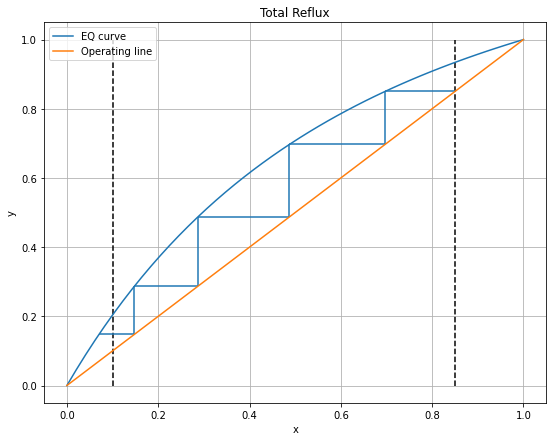

In [9]:
plt.figure(figsize = (9,7))
plt.plot(x,y,label='EQ curve')
plt.plot(x,x,label='Operating line')
plt.vlines(xD,0,1,'k','--')
plt.vlines(xB,0,1,'k','--')

x1 = xD
y1 = xD
x2 = xInterp(y1)
y2 = x2
x3 = xInterp(y2)
y3 = x3
x4 = xInterp(y3)
y4 = x4
x5 = xInterp(y4)
y5 = x5
x6 = xInterp(y5)
y6 = x6

plt.hlines(y1,x1,x2)
plt.vlines(x2,y1,y2)
plt.hlines(y2,x2,x3)
plt.vlines(x3,y2,y3)
plt.hlines(y3,x3,x4)
plt.vlines(x4,y3,y4)
plt.hlines(y4,x4,x5)
plt.vlines(x5,y4,y5)
plt.hlines(y5,x5,x6)

plt.grid()
plt.title('Total Reflux')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
;

5 equilibrim stages is the minimum.

## Problem 1.2
Determine the minimum reflux ratio ($R_{min}$)

$R_{min}$ is found when $\frac{L}{V}$ is a minimum which is true when the q line reaches the equilibrium curve. $\frac{L}{V}$ is the slope of the rectifying section operating line and can be used to find $R_{min}$ by the following relationship,
$$
R_{min} = \frac{(\frac{L}{V})_{min}}{1-(\frac{L}{V})_{min}} \tag{1}
$$
The q line is verticle because the feed is a saturated liquid.

0.6856515206696743


''

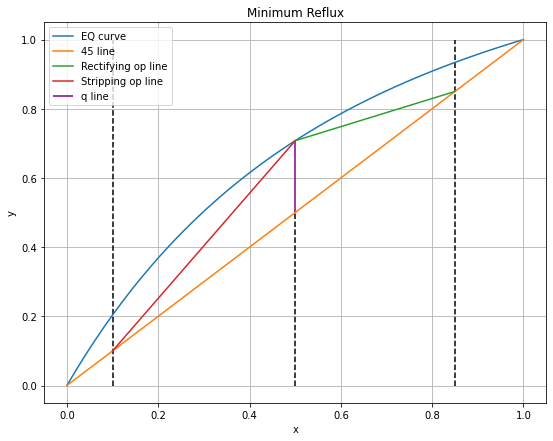

In [10]:
plt.figure(figsize = (9,7))
plt.plot(x,y,label='EQ curve')                                                  #EQ
plt.plot(x,x,label = '45 line')                                                 #45
plt.vlines(xD,0,1,'k','--')                                                     #distil
plt.vlines(xB,0,1,'k','--')                                                     #bott
plt.vlines(z,0,z,'k','--')                                                      #feed
plt.grid()  
plt.vlines(z,z,yInterp(z),'purple',label='q line')                              #q
plt.plot([z,xD],[yInterp(z),xD],label='Rectifying op line')                     #rect
plt.plot([xB,z],[xB,yInterp(z)],label='Stripping op line')                      #strip
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimum Reflux')

mRectMin = (xD-yInterp(z))/(xD-z)                                               #slope of rect
Rmin = mRectMin/(1-mRectMin)                                                    #reflux ratio
print(Rmin)
;

$R_{min} = 0.686$

## Problem 1.3
Determine the required number of stages and feed stage placement if 3x $R_{min}$ is used.

The reflux ratio, $R$ is related to the slope of the operating line by ([1](#mjx-eqn-1)). The operating line also has a point on the $45\degree$ line at the distillate composition. The q line has a slope of $\infin$ because it is a saturated liquid and starts on the $45\degree$ line at the feed composition. The stripping operating line has a point on the $45\degree$ line at the bottoms composition and a point at the composition where the rectifying operating line and q line cross. The stages can then be drawn in and the feed stage placement should at the equilibrium stage that is closest to the intersection of the q line and operating lines.

''

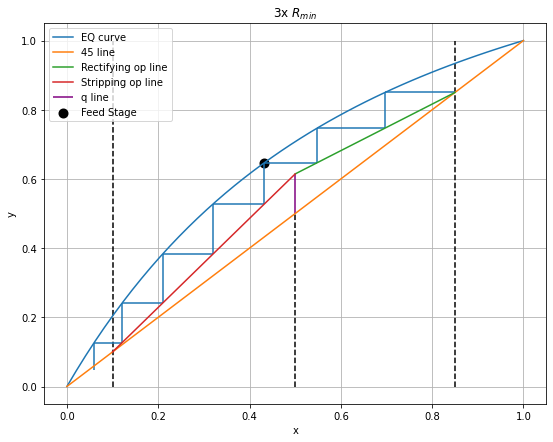

In [11]:
R = 3*Rmin                                                  #reflux
mRect = R/(R+1)                                             #slope of rect

def rect(x):                                                #op line rect
    b = xD-xD*mRect
    return x*mRect+b

mStrip = (rect(z)-xB)/(z-xB)                                #use rect op line to find slope of strip op line

def strip(x):                                               #op line strip
    b = xB-xB*mStrip
    return mStrip*x+b
    
plt.figure(figsize = (9,7))
plt.plot(x,y,label='EQ curve')                              #EQ
plt.plot(x,x,label='45 line')                               #45
plt.vlines(xD,0,1,'k','--')                                 #distil
plt.vlines(xB,0,1,'k','--')                                 #bott
plt.vlines(z,0,z,'k','--')                                  #feed
plt.vlines(z,z,rect(z),'purple',label='q line')                   #q
plt.grid()
plt.plot([z,xD],[rect(z),xD],label='Rectifying op line')    #rect op        
plt.plot([xB,z],[xB,rect(z)],label='Stripping op line')     #strip op

x1 = xD                                                     #stages
y1 = xD
x2 = xInterp(y1)
y2 = rect(x2)
x3 = xInterp(y2)
y3 = rect(x3)
x4 = xInterp(y3)
y4 = strip(x4)
x5 = xInterp(y4)
y5 = strip(x5)
x6 = xInterp(y5)
y6 = strip(x6)
x7 = xInterp(y6)
y7 = strip(x7)
x8 = xInterp(y7)
y8 = strip(x8)

plt.hlines(y1,x1,x2)
plt.vlines(x2,y1,y2)
plt.hlines(y2,x2,x3)
plt.vlines(x3,y2,y3)
plt.hlines(y3,x3,x4)
plt.vlines(x4,y3,y4)
plt.hlines(y4,x4,x5)
plt.vlines(x5,y4,y5)
plt.hlines(y5,x5,x6)
plt.vlines(x6,y5,y6)
plt.hlines(y6,x6,x7)
plt.vlines(x7,y6,y7)
plt.hlines(y7,x7,x8)
plt.vlines(x8,y7,y8)
plt.scatter(x4,y3,linewidths=4,color='k',label='Feed Stage')        #feed stage location
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(''.join(['3x ',r'$R_{min}$']))
;

$7$ equilibrium stages are needed and the location of the feed stage is represented by the black dot on the above plot (stage $3$).

## Problem 1.4
Determine the mass flow rate of the exit streams and the composition of the bottoms stream given the number of EQ stages in part 3.

The flow rate in teh exit streams can be found by the following relationships,
$$
D = F\frac{z_F-x_B}{x_D-x_B} \tag{2}
$$
and
$$
F = D+B \tag{3}
$$

The above relationships assume molar flow rates so I will convert the provided feed flow rate from a mass to molar basis and then convert back to mass after solving the above equations.

The composition of the bottoms is the composition of the last equilibrium stage.

In [12]:
print(x8)                                           #last eq stage
MB = 78.11/1000                                     # molar mass
MT = 92.14/1000

omBF = MB/(MT+MB)                                   # mass frac feed
mB = omBF *F                                        # mass benzene feed
mT = F-mB                                           #mass toluene feed

nB = mB/MB                                          #mol benz feed
nT = mT/MT                                          #mol tol feed
FMol = nB+nT                                        #molar flow rate feed
D = FMol*((z-x8)/(xD-x8))                           #using equation 2 to solve for distillate flow

Dmass = D*xD*MB+D*(1-xD)*MT                         #convert distill flow to mass basis
print(Dmass)
Bmass = F-Dmass                                     # bottoms flow in mass
print(FMol)

0.059791539629629555
23.62245223319215
528.6343612334801


The composition of the bottoms with $7$ stages is about $x_B=0.06$

The mass flow rate of the distillate is about $23.6\frac{kg}{hr}$